# Convolution Layer Visualization

In this notebook, we will study the outputs of each convolution layer(up to a depth of 3 layers) and extract all the feature maps for a single test image.

## Loading Model and Test Image

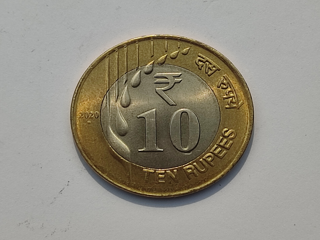

In [1]:
#Model
from tensorflow.keras.models import load_model
model = load_model('/content/Saved_Model')

#Image
from PIL import Image
im = Image.open('/content/Ten_26.jpg')
im = im.crop((1100,700,3000,2300))
im = im.resize((320,240))
display(im)

#Preprocessing Image
import numpy as np
inp_im = np.asarray(im)
inp_im = inp_im/255
inp_im = np.expand_dims(inp_im,axis=0)

In [2]:
#getting layers information
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'global_average_pooling2d', 'dense', 'dense_1']


## Creating separate 'Short Models' for each convolution layer:

A short model is created that takes in input from the previous layer and gives the output of the selected layer, by doing so we can normally fit an image with a short model and get the feature maps the layer has generated.

### Short Models work like this:
1. Train the full model
2. Extract a Short model for each of the Conv. layer that needs to be studied.
3. Use the .predict method on the short model which will return all the generated feature maps.

In this notebook, we will study the outputs of each convolution layer(up to a depth of 3 layers) and extract all the feature maps for a single test image.

In [3]:
from tensorflow.keras.models import Model

#Short Models
conv2d_output = Model(inputs = model.input, outputs = model.get_layer('conv2d').output)
conv2d_1_output = Model(inputs = model.input, outputs = model.get_layer('conv2d_1').output)
conv2d_2_output = Model(inputs = model.input, outputs = model.get_layer('conv2d_2').output)

#extracting Feature maps from first 3 convolution layers
conv2d_features = conv2d_output.predict(inp_im)
conv2d_1_features = conv2d_1_output.predict(inp_im)
conv2d_2_features = conv2d_2_output.predict(inp_im)

print('First convolution layer feature output shape : ',conv2d_features.shape)
print('Second convolution layer feature output shape : ',conv2d_1_features.shape)
print('Third convolution layer feature output shape : ',conv2d_2_features.shape)

First convolution layer feature output shape :  (1, 240, 320, 16)
Second convolution layer feature output shape :  (1, 120, 160, 32)
Third convolution layer feature output shape :  (1, 60, 80, 64)


## A Single Feature from Layer One
Lets look at a random filter from the first convolution layer to solidify what we are looking for.

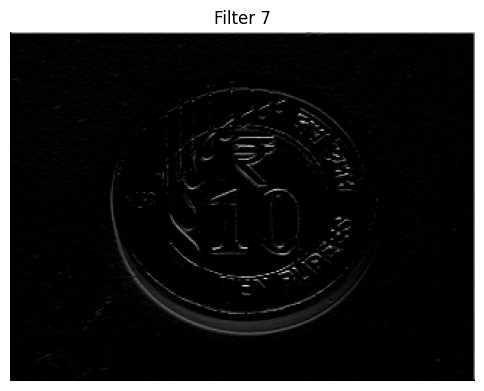

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6),dpi=100)
plt.axis('off')
plt.title('Filter '+str(7))
plt.imshow(conv2d_features[0, :, :, 6], cmap='gray');

## Remarks:

As you can see from the above image, A feature map is nothing but the output of the layer after the convolution operation is done by using a specific filter.

For example, in the given image it can be easily understood that filter 7 of the first Conv. layer was looking for embossment on the surface of the coin.

The filter isolates the carving on the surface that is raised above the surface of the coin. Such filters can be used to isolate the number written on the surface as shown in the image and hence are good filters to predict the denomination of the coin.

## First Convolution layer

Now, that we have established a understanding of what feature maps are, lets visualize all the feature maps of the first layer

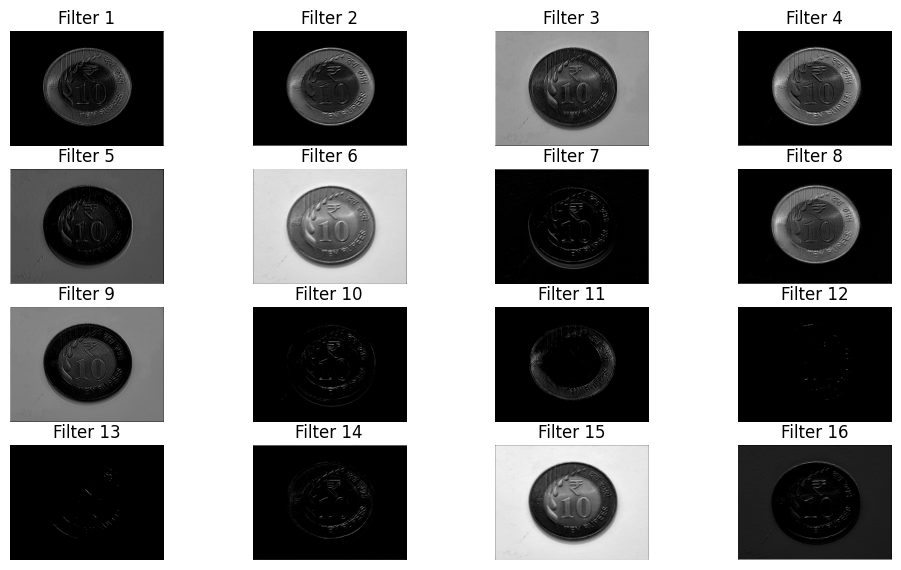

In [5]:
fig = plt.figure(figsize=(12,7),dpi=100)
columns = 4
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('Filter '+str(i+1))
    plt.imshow(conv2d_features[0, :, :, i], cmap='gray')
plt.show()

## Second Convolution Layer

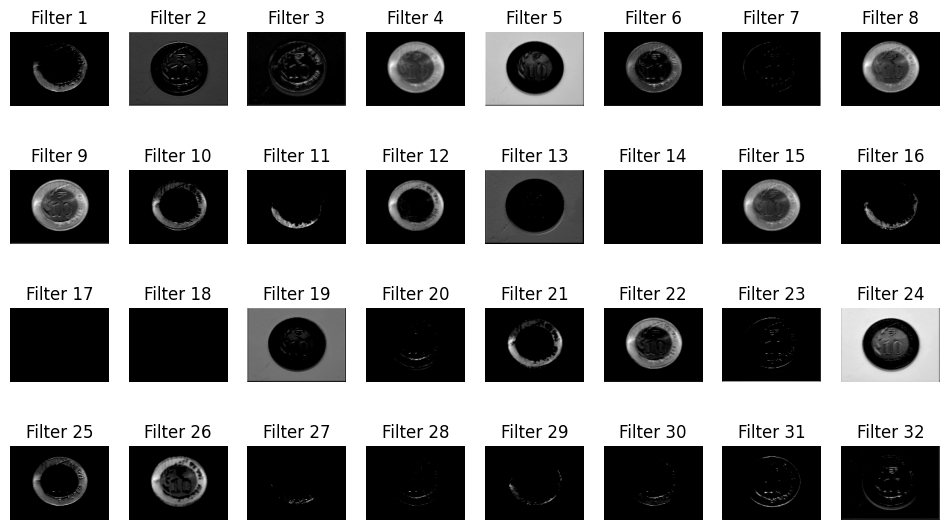

In [6]:
fig = plt.figure(figsize=(12,7),dpi=100)
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('Filter '+str(i+1))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')
plt.show()

## Third Convolution Layer

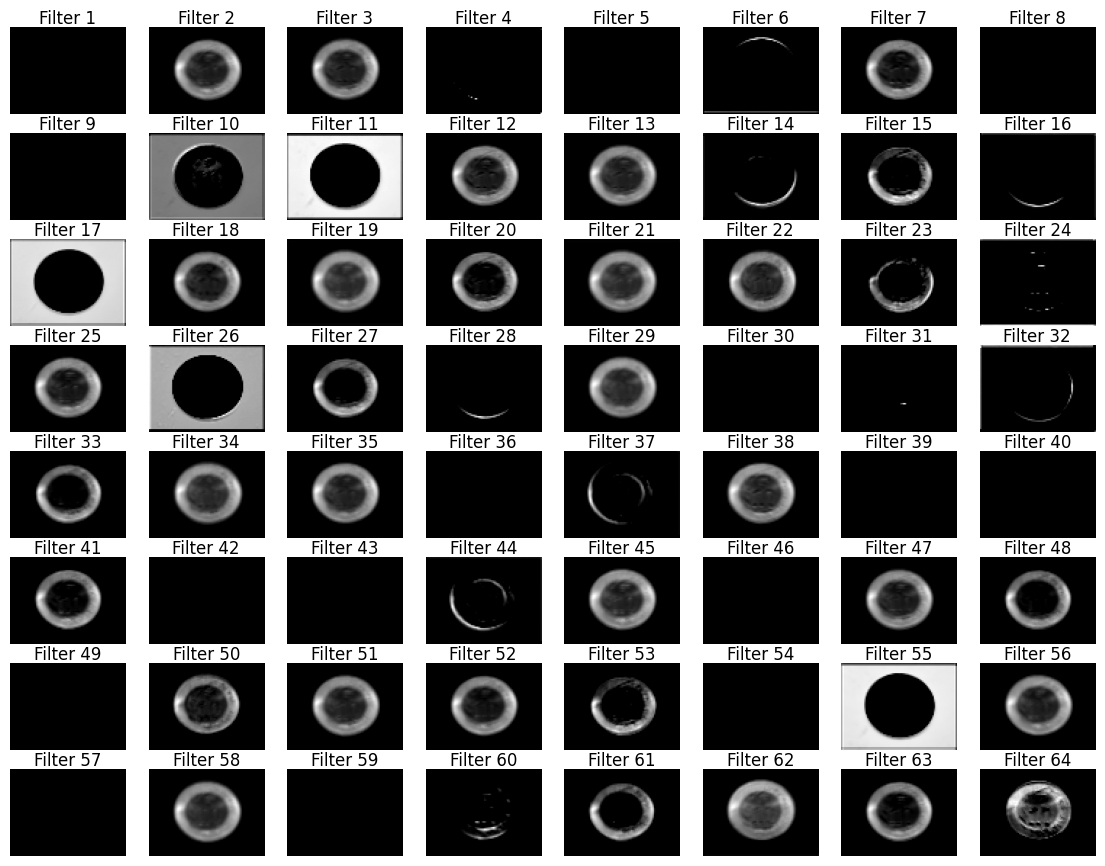

In [7]:
fig = plt.figure(figsize=(14,11),dpi=100)
columns = 8
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('Filter '+str(i+1),pad=0)
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='gray')
plt.show()

## Discussion:

In the third Conv. layer of the model, we generated a good number of feature maps but as we go down in the depth of the model the feature maps stop making sense 'logically' or I should say that the feature maps are harder to interpret as to what are they looking for.

Since the model is not actually seeing the result with a pair of eyes rather it uses the actual pixel values as inputs we can realize that the feature makes sense 'Mathematically' rather than 'visually'.

This is the curse of Convolution operations, they are performing really good but the results in themselves are in-interpretable.

We can go down even further in the model but the feature maps will keep on getting vague and will eventually become nonsensical for the human eye to judge.